# Iris Flower Classification

**Author:** Anik Tahabilder  
**Project:** 2 of 22 - Kaggle ML Portfolio  
**Dataset:** Iris  
**Difficulty:** 2/10 | **Learning Value:** 7/10

---

## What is Classification?

**Classification** is a type of **supervised machine learning** where the goal is to predict a **categorical label** (class) for new observations based on past data.

### Types of Machine Learning:

| Type | Goal | Example |
|------|------|---------|
| **Supervised** | Learn from labeled data | Classification, Regression |
| **Unsupervised** | Find patterns in unlabeled data | Clustering, Dimensionality Reduction |
| **Reinforcement** | Learn through trial and error | Game AI, Robotics |

### Classification vs Regression:

| Classification | Regression |
|---------------|------------|
| Predicts **categories** | Predicts **continuous values** |
| Output: class label | Output: number |
| Example: Spam/Not Spam | Example: House Price |

---

## About the Iris Dataset

The **Iris dataset** is one of the most famous datasets in machine learning, introduced by Ronald Fisher in 1936. It's often called the "Hello World" of machine learning.

### Dataset Description:
- **150 samples** of iris flowers
- **3 species** (classes): Setosa, Versicolor, Virginica
- **4 features**: Sepal length, Sepal width, Petal length, Petal width
- **Balanced**: 50 samples per class

### Our Goal:
Build a model that can predict the **species** of an iris flower based on its **measurements**.

### The ML Pipeline:
```
1. Load Data → 2. Explore/Visualize → 3. Preprocess → 4. Split Data
                                                            ↓
8. Deploy ← 7. Select Best Model ← 6. Evaluate ← 5. Train Models
```

---

## Table of Contents

1. [Part 1: Setup and Data Loading](#part1)
2. [Part 2: Exploratory Data Analysis](#part2)
3. [Part 3: Data Preprocessing](#part3)
4. [Part 4: Building Classification Models](#part4)
5. [Part 5: Model Evaluation](#part5)
6. [Part 6: Model Insights](#part6)
7. [Part 7: Making Predictions](#part7)
8. [Part 8: Summary and Conclusions](#part8)

---
# Part 1: Setup and Data Loading
---

## 1.1 Importing Libraries

For classification tasks, we need:

| Library | Purpose |
|---------|--------|
| **pandas/numpy** | Data manipulation |
| **matplotlib/seaborn** | Visualization |
| **sklearn** | Machine learning algorithms and tools |

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay)

# Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.precision', 3)

print("Libraries loaded successfully!")
print(f"scikit-learn version: {__import__('sklearn').__version__}")

Libraries loaded successfully!
scikit-learn version: 1.8.0


## 1.2 Loading the Iris Dataset

The Iris dataset is built into scikit-learn. We can load it directly using `load_iris()`.

### Understanding sklearn's Dataset Structure:
- `data`: Feature matrix (X)
- `target`: Target vector (y)
- `feature_names`: Names of features
- `target_names`: Names of classes

In [2]:
# Load the Iris dataset from sklearn
iris = load_iris()

# Explore the dataset structure
print("=" * 60)
print("IRIS DATASET STRUCTURE")
print("=" * 60)
print(f"\nKeys in dataset: {iris.keys()}")
print(f"\nFeature names: {iris.feature_names}")
print(f"Target names (classes): {iris.target_names}")
print(f"\nData shape: {iris.data.shape}")
print(f"Target shape: {iris.target.shape}")

IRIS DATASET STRUCTURE

Keys in dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names (classes): ['setosa' 'versicolor' 'virginica']

Data shape: (150, 4)
Target shape: (150,)


In [3]:
# Convert to pandas DataFrame for easier manipulation
# This is a common practice - sklearn returns numpy arrays, but pandas is easier to work with

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map numeric labels to species names for readability
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("DataFrame created successfully!")
print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns")
df.head(10)

DataFrame created successfully!
Shape: 150 rows x 6 columns


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


---
# Part 2: Exploratory Data Analysis (EDA)
---

## 2.1 Data Overview

Before building models, we must understand our data!

In [4]:
# Basic info about the dataset
print("=" * 60)
print("DATASET INFO")
print("=" * 60)
df.info()

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Statistical summary
print("=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
df.describe()

STATISTICAL SUMMARY


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199,1.000
std,0.828,0.436,1.765,0.762,0.819
min,4.300,2.000,1.000,0.100,0.000
25%,5.100,2.800,1.600,0.300,0.000
50%,5.800,3.000,4.350,1.300,1.000
75%,6.400,3.300,5.100,1.800,2.000
max,7.900,4.400,6.900,2.500,2.000


In [6]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)
missing = df.isnull().sum()
print(missing)
print(f"\nTotal missing values: {missing.sum()}")
print("\nGreat! No missing values - the Iris dataset is clean.")

MISSING VALUES CHECK
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

Total missing values: 0

Great! No missing values - the Iris dataset is clean.


In [7]:
# Class distribution - VERY IMPORTANT for classification!
print("=" * 60)
print("CLASS DISTRIBUTION")
print("=" * 60)

class_counts = df['species_name'].value_counts()
print(class_counts)
print(f"\nTotal samples: {len(df)}")
print(f"Samples per class: {len(df) // 3}")
print("\nThis is a BALANCED dataset - equal samples per class!")
print("Balanced datasets are easier to work with.")

CLASS DISTRIBUTION
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Total samples: 150
Samples per class: 50

This is a BALANCED dataset - equal samples per class!
Balanced datasets are easier to work with.


## 2.2 Target Variable Visualization

### Why Check Class Balance?

| Dataset Type | Characteristic | Challenge |
|-------------|----------------|----------|
| **Balanced** | Equal samples per class | None |
| **Imbalanced** | Unequal samples | Model may favor majority class |

For imbalanced data, accuracy alone is misleading!

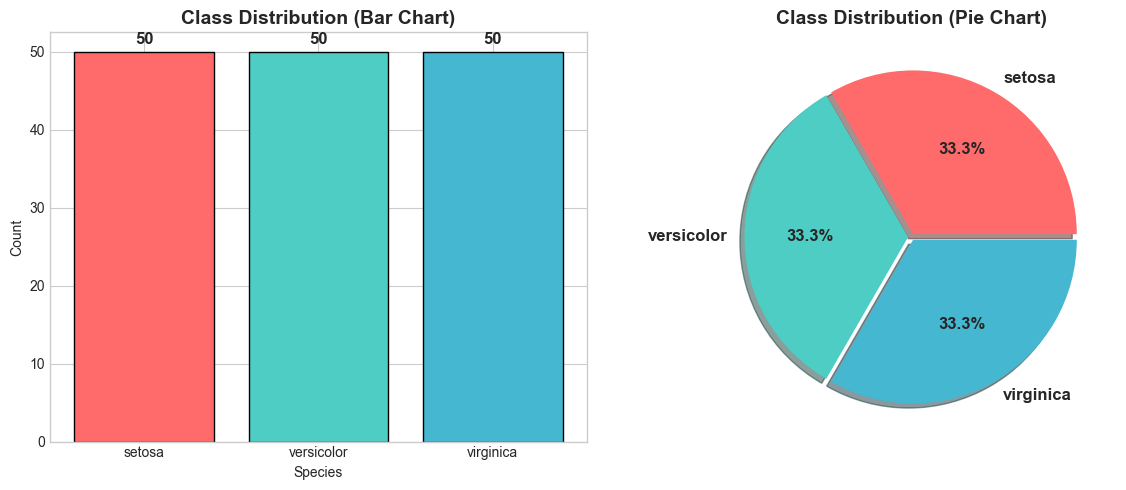

Each class has exactly 33.3% of the data - perfectly balanced!


In [8]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = axes[0].bar(class_counts.index, class_counts.values, color=colors, edgecolor='black')
axes[0].set_title('Class Distribution (Bar Chart)', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Count')
for bar, val in zip(bars, class_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{val}', ha='center', fontweight='bold', fontsize=12)

# Pie chart
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
            colors=colors, explode=(0.02, 0.02, 0.02), shadow=True,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (Pie Chart)', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

print("Each class has exactly 33.3% of the data - perfectly balanced!")

## 2.3 Feature Distributions

Understanding feature distributions helps us:
1. Identify **outliers**
2. Decide if **scaling** is needed
3. See if features **separate classes** well

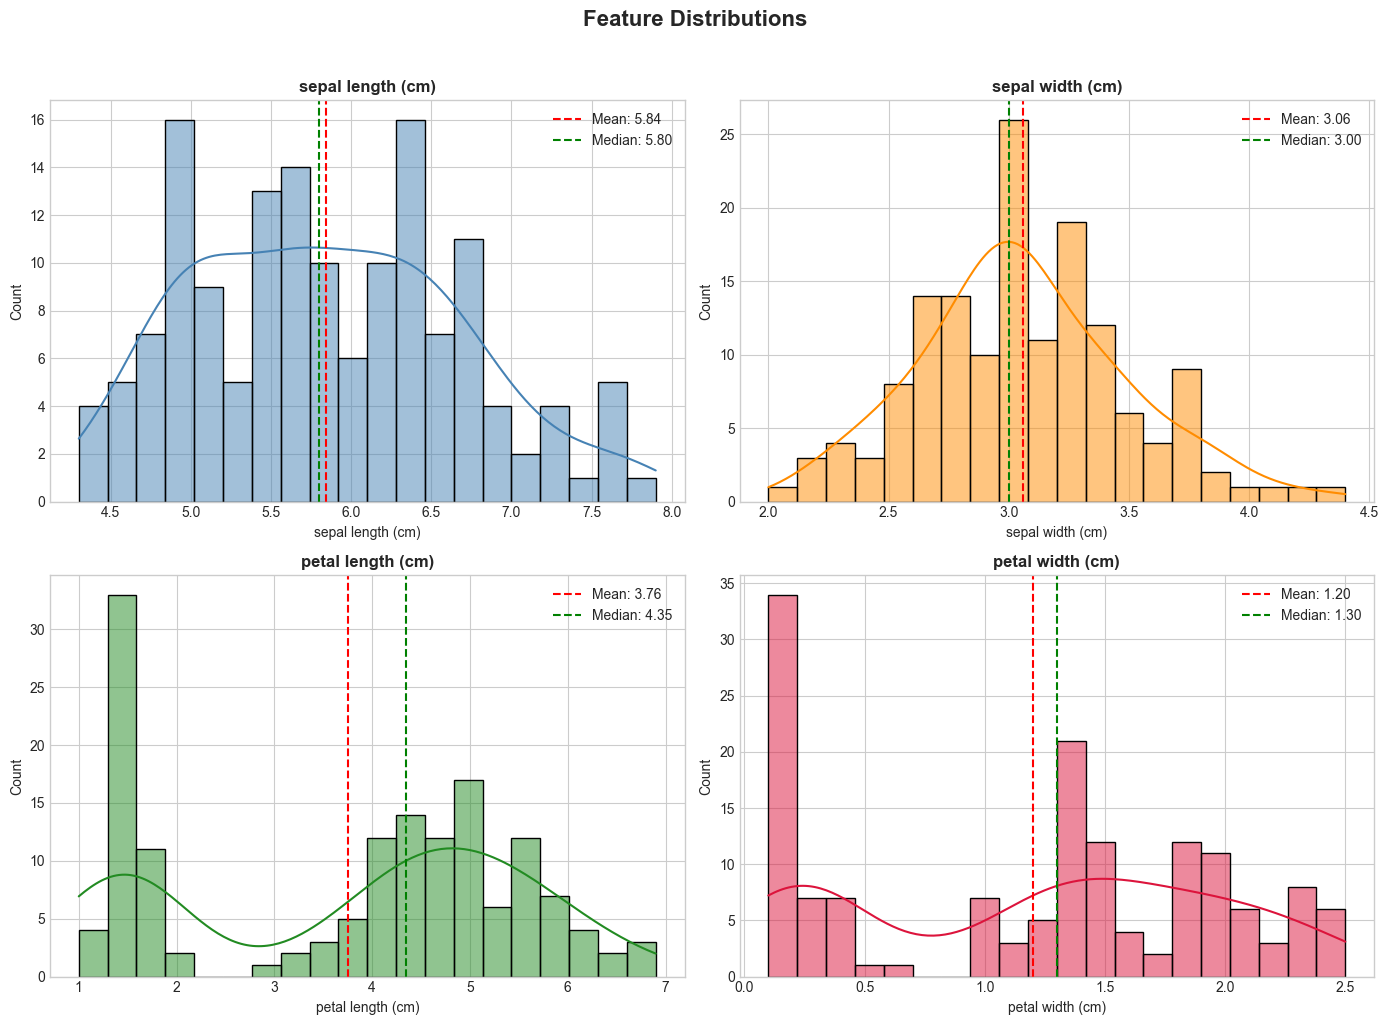

Observations:
- Sepal measurements have more overlap between classes
- Petal measurements show more distinct distributions
- All features are roughly normally distributed


In [9]:
# Distribution of each feature
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

features = iris.feature_names
colors = ['steelblue', 'darkorange', 'forestgreen', 'crimson']

for i, (feature, color) in enumerate(zip(features, colors)):
    # Histogram with KDE
    sns.histplot(data=df, x=feature, kde=True, color=color, ax=axes[i], bins=20)
    axes[i].axvline(df[feature].mean(), color='red', linestyle='--', 
                    label=f'Mean: {df[feature].mean():.2f}')
    axes[i].axvline(df[feature].median(), color='green', linestyle='--',
                    label=f'Median: {df[feature].median():.2f}')
    axes[i].set_title(f'{feature}', fontweight='bold')
    axes[i].legend()

plt.suptitle('Feature Distributions', fontweight='bold', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("Observations:")
print("- Sepal measurements have more overlap between classes")
print("- Petal measurements show more distinct distributions")
print("- All features are roughly normally distributed")

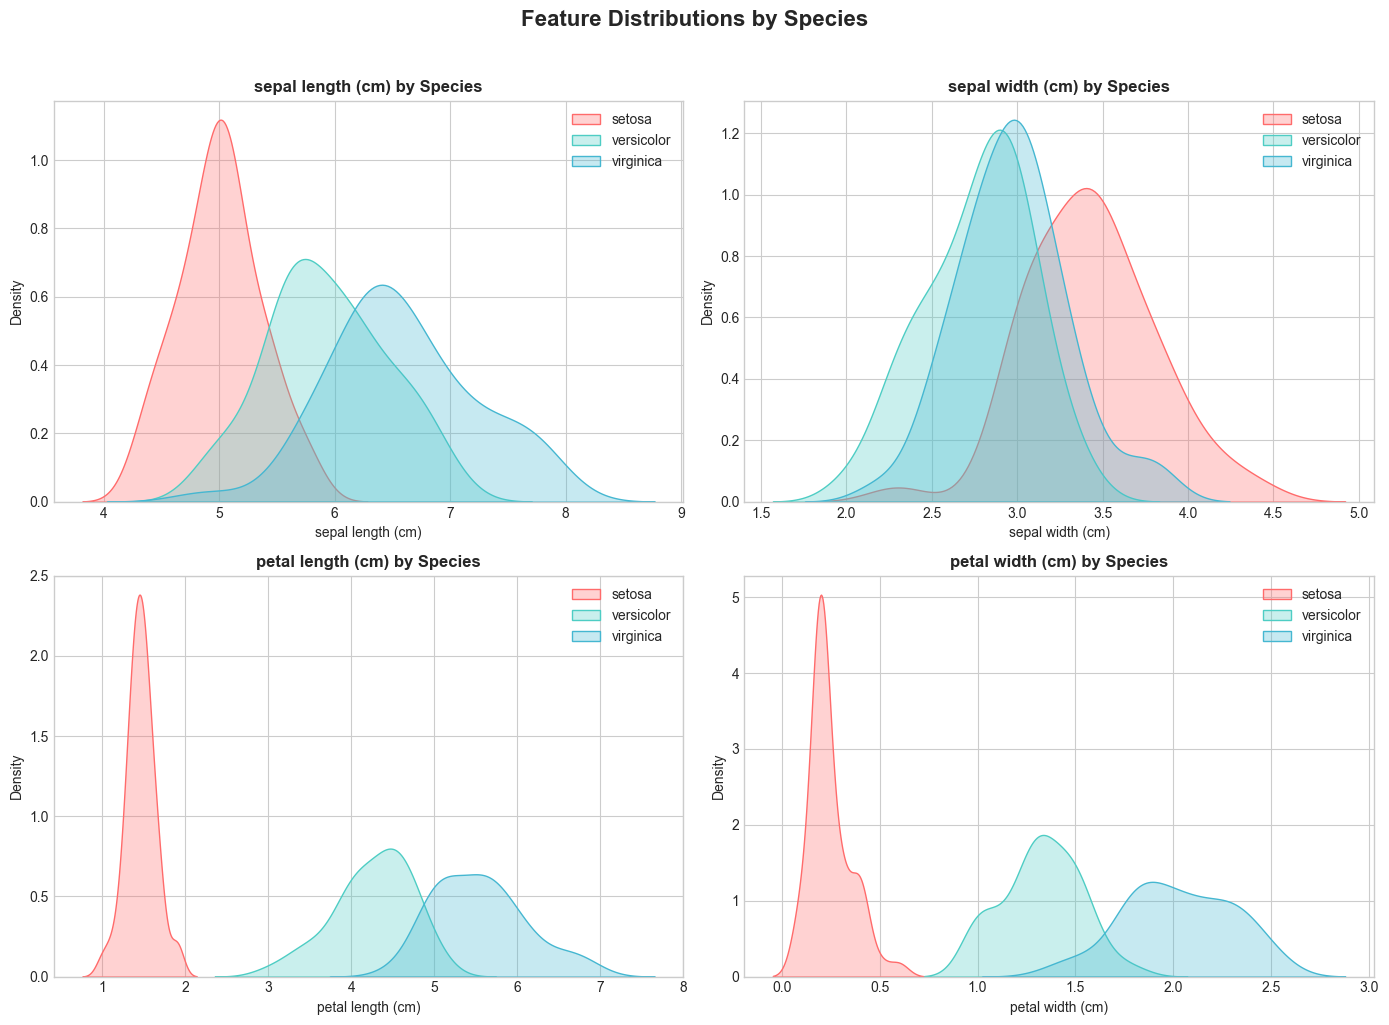


Key Insight:
- Setosa is clearly separable (especially by petal measurements)
- Versicolor and Virginica overlap more - harder to distinguish
- Petal length and width are the BEST features for classification!


In [10]:
# Feature distributions BY CLASS - This is KEY for classification!
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    for species, color in zip(['setosa', 'versicolor', 'virginica'], 
                               ['#FF6B6B', '#4ECDC4', '#45B7D1']):
        subset = df[df['species_name'] == species]
        sns.kdeplot(data=subset, x=feature, ax=axes[i], 
                    label=species, color=color, fill=True, alpha=0.3)
    axes[i].set_title(f'{feature} by Species', fontweight='bold')
    axes[i].legend()

plt.suptitle('Feature Distributions by Species', fontweight='bold', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\nKey Insight:")
print("- Setosa is clearly separable (especially by petal measurements)")
print("- Versicolor and Virginica overlap more - harder to distinguish")
print("- Petal length and width are the BEST features for classification!")

## 2.4 Box Plots - Detecting Outliers

Box plots show:
- **Median** (line in box)
- **IQR** (box = Q1 to Q3)
- **Whiskers** (1.5 × IQR)
- **Outliers** (points beyond whiskers)

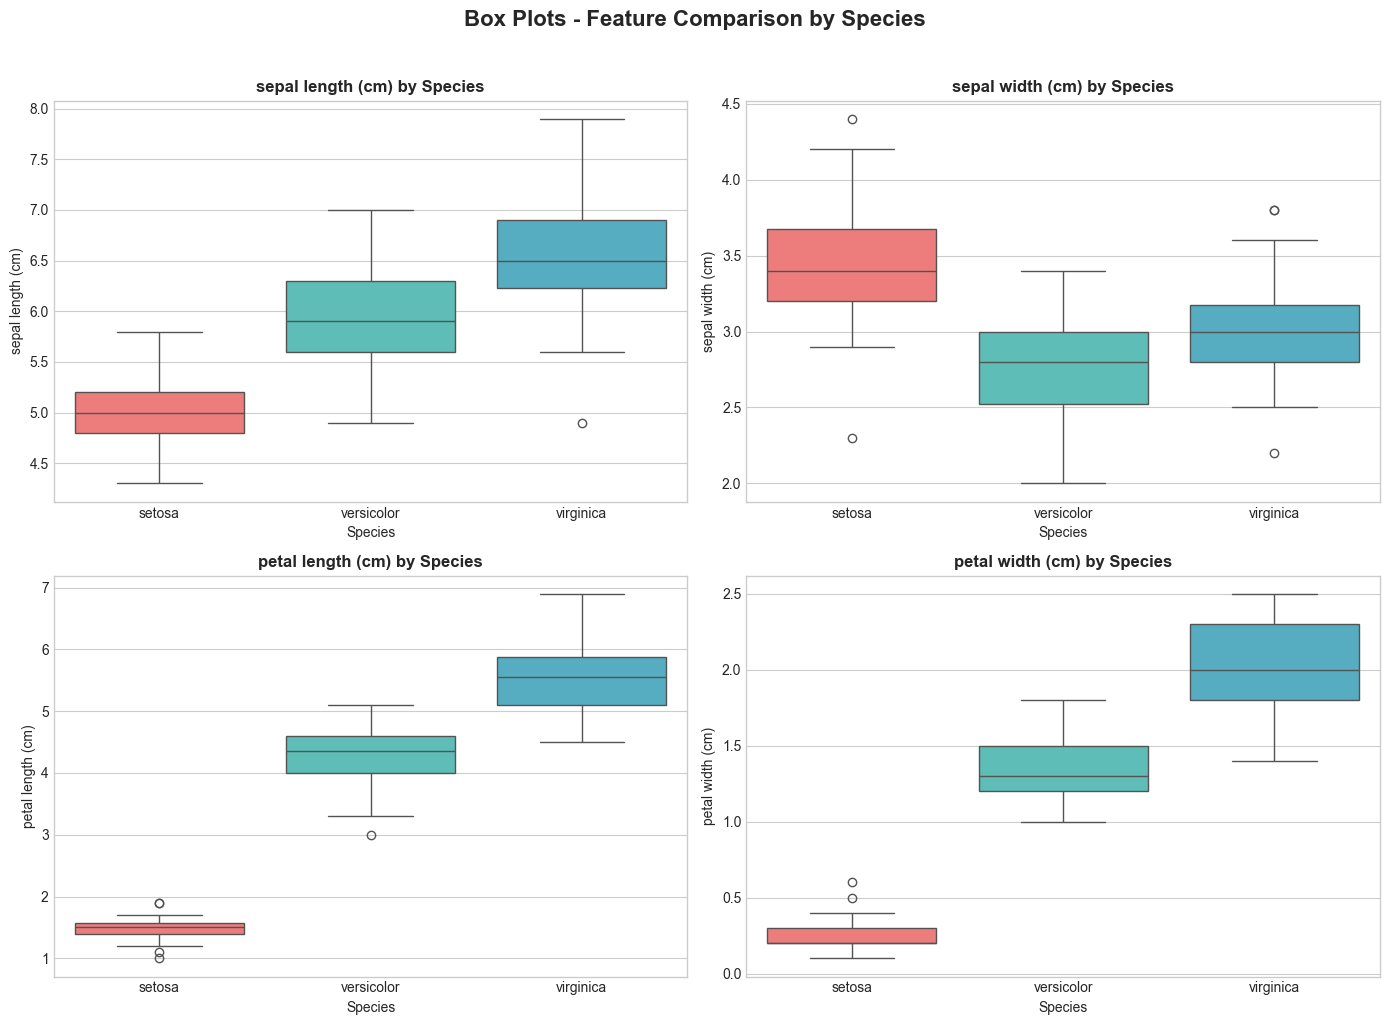

Observations:
- Few outliers in the dataset
- Setosa has smallest petal measurements
- Virginica has largest measurements overall
- Clear progression: Setosa < Versicolor < Virginica (for most features)


In [11]:
# Box plots for each feature by species
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.boxplot(data=df, x='species_name', y=feature, 
                palette=['#FF6B6B', '#4ECDC4', '#45B7D1'], ax=axes[i])
    axes[i].set_title(f'{feature} by Species', fontweight='bold')
    axes[i].set_xlabel('Species')

plt.suptitle('Box Plots - Feature Comparison by Species', fontweight='bold', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("Observations:")
print("- Few outliers in the dataset")
print("- Setosa has smallest petal measurements")
print("- Virginica has largest measurements overall")
print("- Clear progression: Setosa < Versicolor < Virginica (for most features)")

## 2.5 Correlation Analysis

### Why Check Correlations?

1. **Highly correlated features** may be redundant
2. Helps identify **feature relationships**
3. Can guide **feature selection**

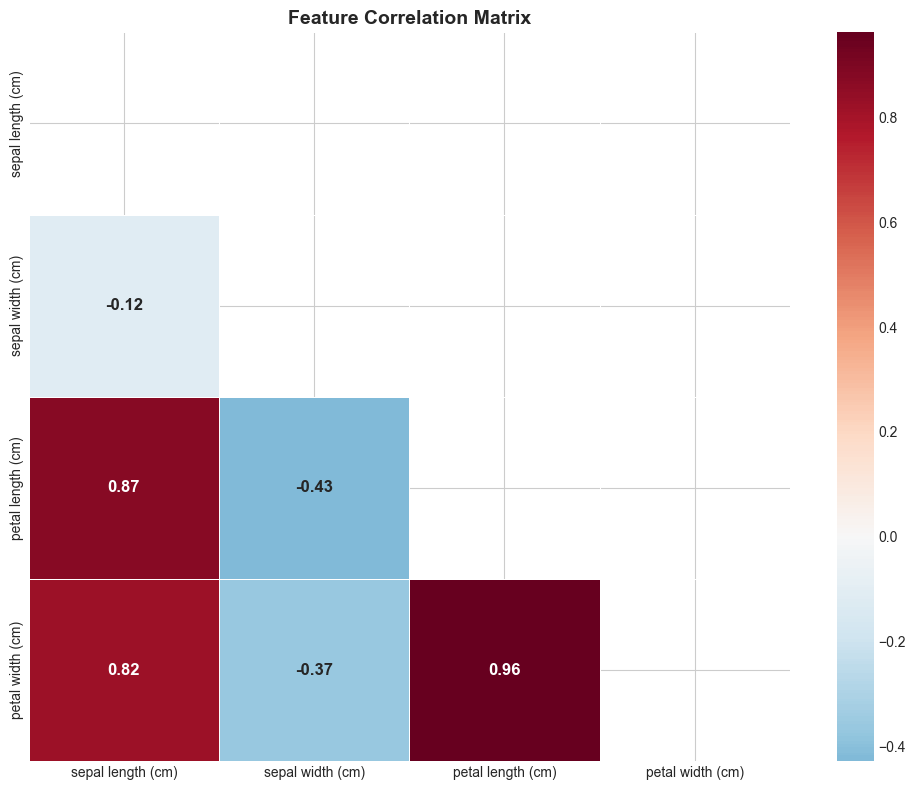


Correlation Insights:
- Petal length & width are highly correlated (0.96)
- Sepal length correlates with petal measurements
- Sepal width has weak/negative correlations with other features


In [12]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))

# Select only numeric columns (excluding species)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('species')  # Remove target

corr_matrix = df[numeric_cols].corr()

# Heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0,
            fmt='.2f', linewidths=0.5, mask=mask,
            annot_kws={'size': 12, 'weight': 'bold'})
plt.title('Feature Correlation Matrix', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print("\nCorrelation Insights:")
print("- Petal length & width are highly correlated (0.96)")
print("- Sepal length correlates with petal measurements")
print("- Sepal width has weak/negative correlations with other features")

## 2.6 Pair Plot - The Complete Picture

A **pair plot** shows:
- All pairwise feature relationships
- Distribution of each feature
- Class separation in feature space

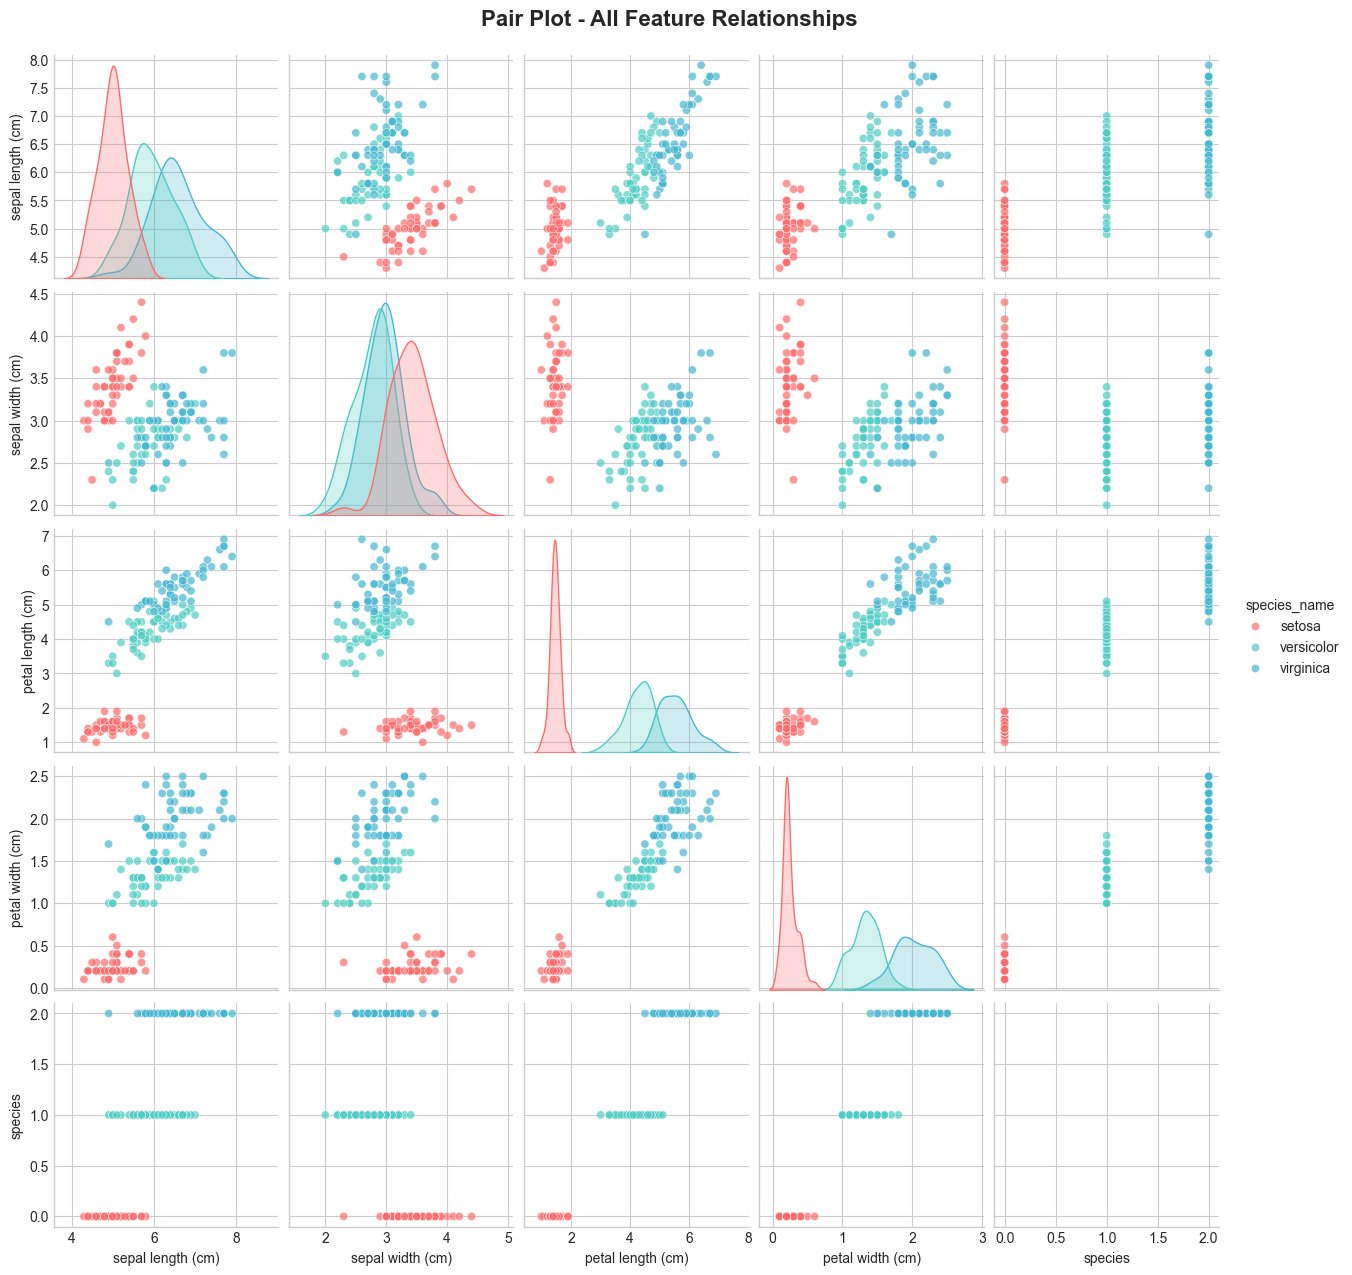


Key Takeaways from Pair Plot:
1. Setosa (red) is linearly separable from other classes
2. Versicolor and Virginica have some overlap
3. Petal features provide the best class separation
4. A simple linear classifier should work well for Setosa


In [13]:
# Pair plot - shows all feature relationships
g = sns.pairplot(df, hue='species_name', 
                  palette=['#FF6B6B', '#4ECDC4', '#45B7D1'],
                  diag_kind='kde', plot_kws={'alpha': 0.7})
g.fig.suptitle('Pair Plot - All Feature Relationships', fontweight='bold', y=1.02, fontsize=16)
plt.show()

print("\nKey Takeaways from Pair Plot:")
print("1. Setosa (red) is linearly separable from other classes")
print("2. Versicolor and Virginica have some overlap")
print("3. Petal features provide the best class separation")
print("4. A simple linear classifier should work well for Setosa")

## 2.7 Scatter Plots - Best Feature Pairs

Let's focus on the most discriminative feature pairs.

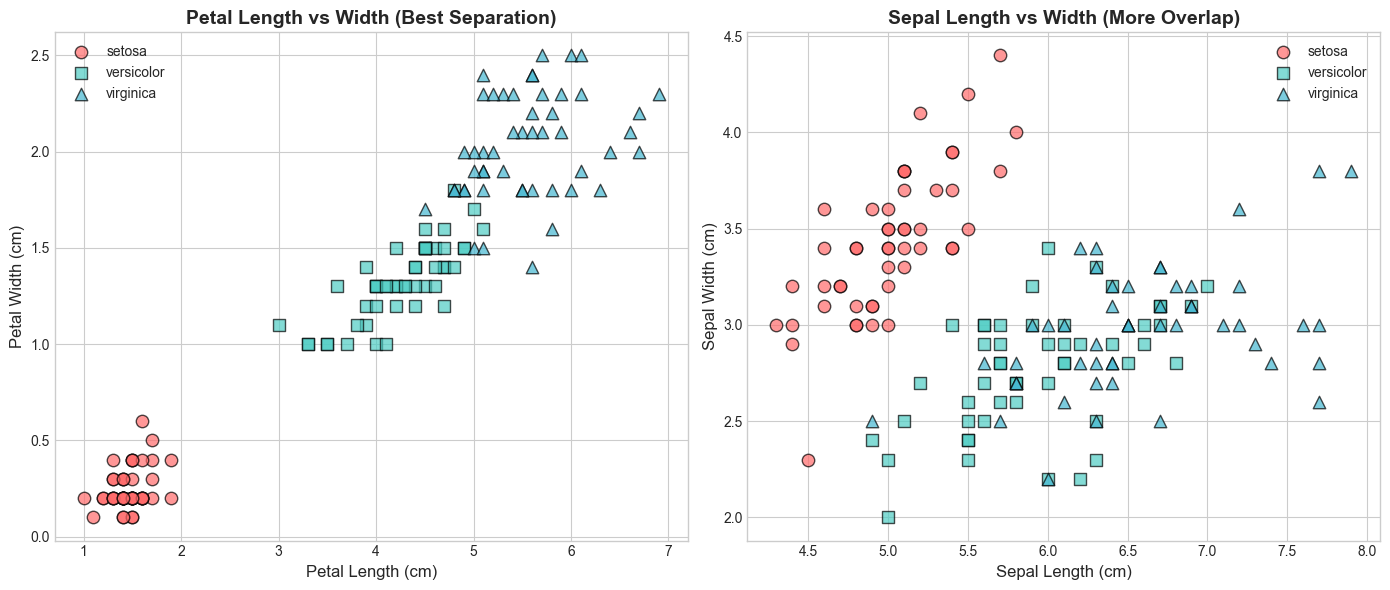


Comparison:
- LEFT: Petal features show clear class boundaries
- RIGHT: Sepal features have significant overlap
- Petal measurements are more useful for classification!


In [14]:
# Best feature pairs for classification
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Petal length vs Petal width (BEST pair)
for species, color, marker in zip(['setosa', 'versicolor', 'virginica'],
                                   ['#FF6B6B', '#4ECDC4', '#45B7D1'],
                                   ['o', 's', '^']):
    subset = df[df['species_name'] == species]
    axes[0].scatter(subset['petal length (cm)'], subset['petal width (cm)'],
                    c=color, label=species, marker=marker, s=80, alpha=0.7, edgecolors='black')
axes[0].set_xlabel('Petal Length (cm)', fontsize=12)
axes[0].set_ylabel('Petal Width (cm)', fontsize=12)
axes[0].set_title('Petal Length vs Width (Best Separation)', fontweight='bold', fontsize=14)
axes[0].legend()

# Plot 2: Sepal length vs Sepal width (Less separation)
for species, color, marker in zip(['setosa', 'versicolor', 'virginica'],
                                   ['#FF6B6B', '#4ECDC4', '#45B7D1'],
                                   ['o', 's', '^']):
    subset = df[df['species_name'] == species]
    axes[1].scatter(subset['sepal length (cm)'], subset['sepal width (cm)'],
                    c=color, label=species, marker=marker, s=80, alpha=0.7, edgecolors='black')
axes[1].set_xlabel('Sepal Length (cm)', fontsize=12)
axes[1].set_ylabel('Sepal Width (cm)', fontsize=12)
axes[1].set_title('Sepal Length vs Width (More Overlap)', fontweight='bold', fontsize=14)
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nComparison:")
print("- LEFT: Petal features show clear class boundaries")
print("- RIGHT: Sepal features have significant overlap")
print("- Petal measurements are more useful for classification!")

---
# Part 3: Data Preprocessing
---

## Why Preprocess Data?

| Step | Why It's Needed |
|------|----------------|
| **Train/Test Split** | Evaluate model on unseen data |
| **Feature Scaling** | Some algorithms are sensitive to feature magnitudes |
| **Encoding** | Convert categorical variables to numbers |

## 3.1 Train-Test Split

### The Golden Rule of ML:
> **Never** evaluate your model on data it was trained on!

### Common Split Ratios:
- **80/20**: Most common (80% train, 20% test)
- **70/30**: More test data for smaller datasets
- **90/10**: For very large datasets

In [15]:
# Prepare features (X) and target (y)
X = df[iris.feature_names]  # Features: 4 columns
y = df['species']           # Target: species (0, 1, 2)

print("Features (X):")
print(f"  Shape: {X.shape}")
print(f"  Columns: {list(X.columns)}")

print(f"\nTarget (y):")
print(f"  Shape: {y.shape}")
print(f"  Classes: {y.unique()}")
print(f"  Class names: {iris.target_names}")

Features (X):
  Shape: (150, 4)
  Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target (y):
  Shape: (150,)
  Classes: [0 1 2]
  Class names: ['setosa' 'versicolor' 'virginica']


In [16]:
# Split the data into training and testing sets
# test_size=0.2 means 20% for testing, 80% for training
# random_state ensures reproducibility
# stratify=y ensures each class is proportionally represented

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,     # For reproducibility
    stratify=y           # Maintain class proportions
)

print("=" * 60)
print("TRAIN-TEST SPLIT")
print("=" * 60)
print(f"\nTotal samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.0f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.0f}%)")

print(f"\nClass distribution in training set:")
print(pd.Series(y_train).value_counts().sort_index())

print(f"\nClass distribution in test set:")
print(pd.Series(y_test).value_counts().sort_index())

TRAIN-TEST SPLIT

Total samples: 150
Training samples: 120 (80%)
Testing samples: 30 (20%)

Class distribution in training set:
species
0    40
1    40
2    40
Name: count, dtype: int64

Class distribution in test set:
species
0    10
1    10
2    10
Name: count, dtype: int64


## 3.2 Feature Scaling

### Why Scale Features?

Some algorithms are sensitive to feature magnitudes:

| Algorithm | Needs Scaling? | Why |
|-----------|---------------|-----|
| **KNN** | Yes | Uses distance calculations |
| **SVM** | Yes | Optimization sensitive to scale |
| **Logistic Regression** | Sometimes | Helps convergence |
| **Decision Trees** | No | Uses splits, not distances |
| **Random Forest** | No | Based on decision trees |

### Common Scaling Methods:

| Method | Formula | Range |
|--------|---------|-------|
| **StandardScaler** | (x - mean) / std | ~[-3, 3] |
| **MinMaxScaler** | (x - min) / (max - min) | [0, 1] |

### Important: Fit on Training Data Only!
To prevent **data leakage**, fit the scaler on training data and transform both sets.

In [17]:
# Feature scaling using StandardScaler
scaler = StandardScaler()

# Fit on training data, transform both
X_train_scaled = scaler.fit_transform(X_train)  # Fit + Transform
X_test_scaled = scaler.transform(X_test)         # Transform only (use training params)

# Convert back to DataFrames for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("=" * 60)
print("FEATURE SCALING COMPARISON")
print("=" * 60)

print("\nBEFORE Scaling (Training Data):")
print(X_train.describe().loc[['mean', 'std', 'min', 'max']])

print("\nAFTER Scaling (Training Data):")
print(X_train_scaled.describe().loc[['mean', 'std', 'min', 'max']])

print("\nNote: After scaling, mean ≈ 0 and std ≈ 1")

FEATURE SCALING COMPARISON

BEFORE Scaling (Training Data):
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
mean              5.842             3.048              3.770             1.205
std               0.841             0.449              1.769             0.763
min               4.300             2.000              1.100             0.100
max               7.900             4.400              6.900             2.500

AFTER Scaling (Training Data):
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
mean         -1.184e-15        -1.998e-15          4.959e-16         1.669e-15
std           1.004e+00         1.004e+00          1.004e+00         1.004e+00
min          -1.841e+00        -2.347e+00         -1.516e+00        -1.455e+00
max           2.458e+00         3.026e+00          1.777e+00         1.705e+00

Note: After scaling, mean ≈ 0 and std ≈ 1


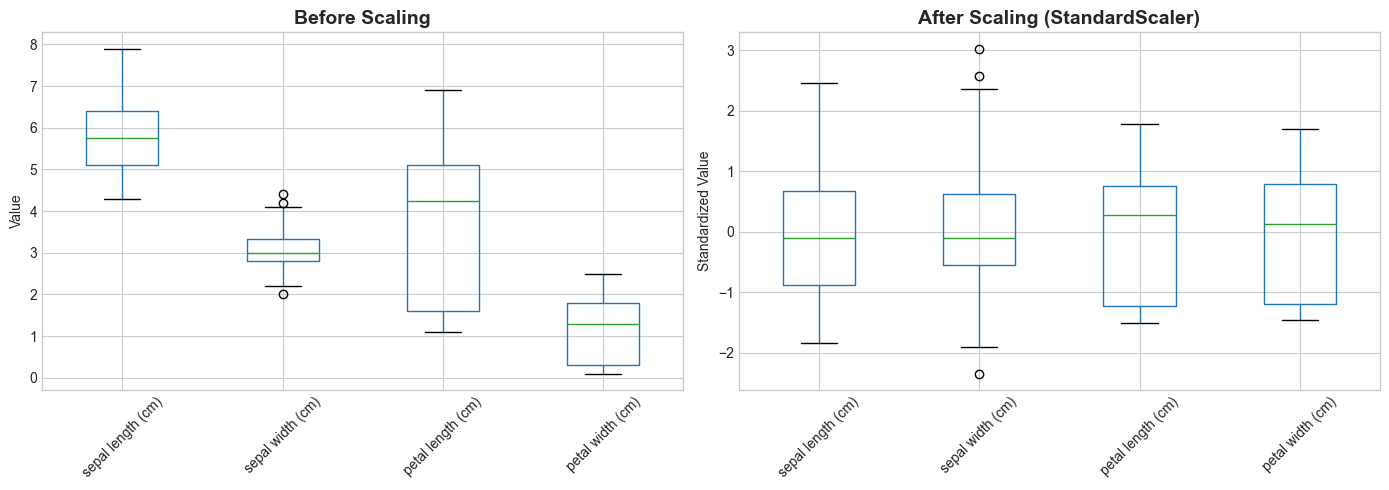

After scaling, all features are on the same scale!


In [18]:
# Visualize the effect of scaling
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
X_train.boxplot(ax=axes[0])
axes[0].set_title('Before Scaling', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Value')
axes[0].tick_params(axis='x', rotation=45)

# After scaling
X_train_scaled.boxplot(ax=axes[1])
axes[1].set_title('After Scaling (StandardScaler)', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Standardized Value')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("After scaling, all features are on the same scale!")

---
# Part 4: Building Classification Models
---

## Classification Algorithms Overview

We'll train **6 different classifiers** and compare their performance:

| Algorithm | Type | Key Idea |
|-----------|------|----------|
| **Logistic Regression** | Linear | Finds linear decision boundary |
| **K-Nearest Neighbors (KNN)** | Instance-based | Classifies based on closest neighbors |
| **Decision Tree** | Tree-based | Makes splits based on features |
| **Random Forest** | Ensemble | Multiple decision trees voting |
| **Support Vector Machine (SVM)** | Kernel-based | Finds optimal separating hyperplane |
| **Naive Bayes** | Probabilistic | Uses Bayes' theorem |

## 4.1 Model Training

### The Basic ML Workflow:
```python
# 1. Create model instance
model = Algorithm()

# 2. Train on training data
model.fit(X_train, y_train)

# 3. Make predictions
predictions = model.predict(X_test)

# 4. Evaluate
accuracy = accuracy_score(y_test, predictions)
```

In [19]:
# Define all models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=200),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42),
    'Naive Bayes': GaussianNB()
}

print("Models to train:")
for i, name in enumerate(models.keys(), 1):
    print(f"  {i}. {name}")

Models to train:
  1. Logistic Regression
  2. K-Nearest Neighbors
  3. Decision Tree
  4. Random Forest
  5. Support Vector Machine
  6. Naive Bayes


In [20]:
# Train all models and store results
results = {}

print("=" * 70)
print("TRAINING AND EVALUATING MODELS")
print("=" * 70)

for name, model in models.items():
    # Train the model (use scaled data for distance-based algorithms)
    if name in ['K-Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy
    }
    
    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\n" + "=" * 70)
print("All models trained successfully!")

TRAINING AND EVALUATING MODELS

Logistic Regression:
  Accuracy: 0.9333 (93.33%)

K-Nearest Neighbors:
  Accuracy: 0.9333 (93.33%)

Decision Tree:
  Accuracy: 0.9333 (93.33%)

Random Forest:
  Accuracy: 0.9000 (90.00%)

Support Vector Machine:
  Accuracy: 0.9667 (96.67%)

Naive Bayes:
  Accuracy: 0.9667 (96.67%)

All models trained successfully!


---
# Part 5: Model Evaluation
---

## Evaluation Metrics for Classification

### Accuracy Alone is Not Enough!

For a complete picture, we need:

| Metric | Formula | Meaning |
|--------|---------|--------|
| **Accuracy** | Correct / Total | Overall correctness |
| **Precision** | TP / (TP + FP) | Of predicted positives, how many are correct? |
| **Recall** | TP / (TP + FN) | Of actual positives, how many did we find? |
| **F1-Score** | 2 × (P × R) / (P + R) | Harmonic mean of precision and recall |

### Confusion Matrix:
Shows how predictions compare to actual values:
```
                 Predicted
              Pos     Neg
Actual Pos   [TP]    [FN]
       Neg   [FP]    [TN]
```

## 5.1 Accuracy Comparison

In [21]:
# Compare model accuracies
accuracies = {name: res['accuracy'] for name, res in results.items()}
accuracies_sorted = dict(sorted(accuracies.items(), key=lambda x: x[1], reverse=True))

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': accuracies_sorted.keys(),
    'Accuracy': accuracies_sorted.values()
})
comparison_df['Accuracy %'] = (comparison_df['Accuracy'] * 100).round(2)
comparison_df['Rank'] = range(1, len(comparison_df) + 1)
comparison_df = comparison_df[['Rank', 'Model', 'Accuracy', 'Accuracy %']]

print("=" * 60)
print("MODEL ACCURACY COMPARISON")
print("=" * 60)
print(comparison_df.to_string(index=False))

MODEL ACCURACY COMPARISON
 Rank                  Model  Accuracy  Accuracy %
    1 Support Vector Machine     0.967       96.67
    2            Naive Bayes     0.967       96.67
    3    Logistic Regression     0.933       93.33
    4    K-Nearest Neighbors     0.933       93.33
    5          Decision Tree     0.933       93.33
    6          Random Forest     0.900       90.00


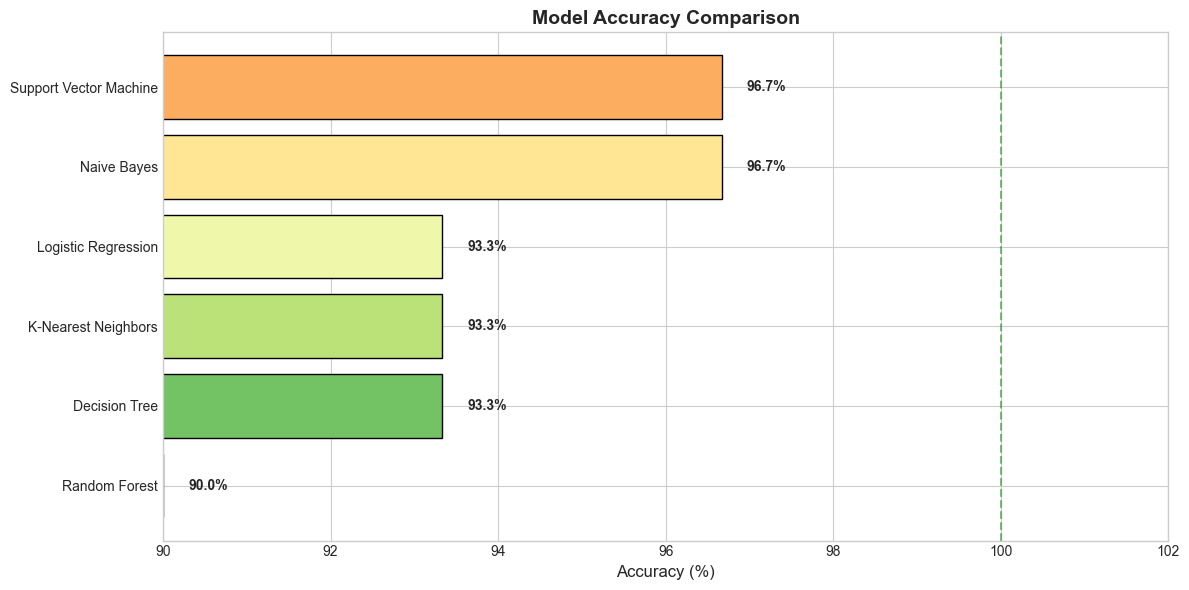


Best Model: Support Vector Machine with 96.67% accuracy


In [22]:
# Visualize model comparison
fig, ax = plt.subplots(figsize=(12, 6))

models_sorted = list(accuracies_sorted.keys())
acc_sorted = list(accuracies_sorted.values())

colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(models_sorted)))
bars = ax.barh(models_sorted[::-1], [a*100 for a in acc_sorted[::-1]], 
               color=colors[::-1], edgecolor='black')

ax.set_xlim(90, 102)
ax.set_xlabel('Accuracy (%)', fontsize=12)
ax.set_title('Model Accuracy Comparison', fontweight='bold', fontsize=14)
ax.axvline(x=100, color='green', linestyle='--', alpha=0.5, label='Perfect Score')

# Add value labels
for bar, acc in zip(bars, acc_sorted[::-1]):
    ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
            f'{acc*100:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

best_model = models_sorted[0]
print(f"\nBest Model: {best_model} with {accuracies_sorted[best_model]*100:.2f}% accuracy")

## 5.2 Confusion Matrices

A confusion matrix shows **where** the model makes mistakes.

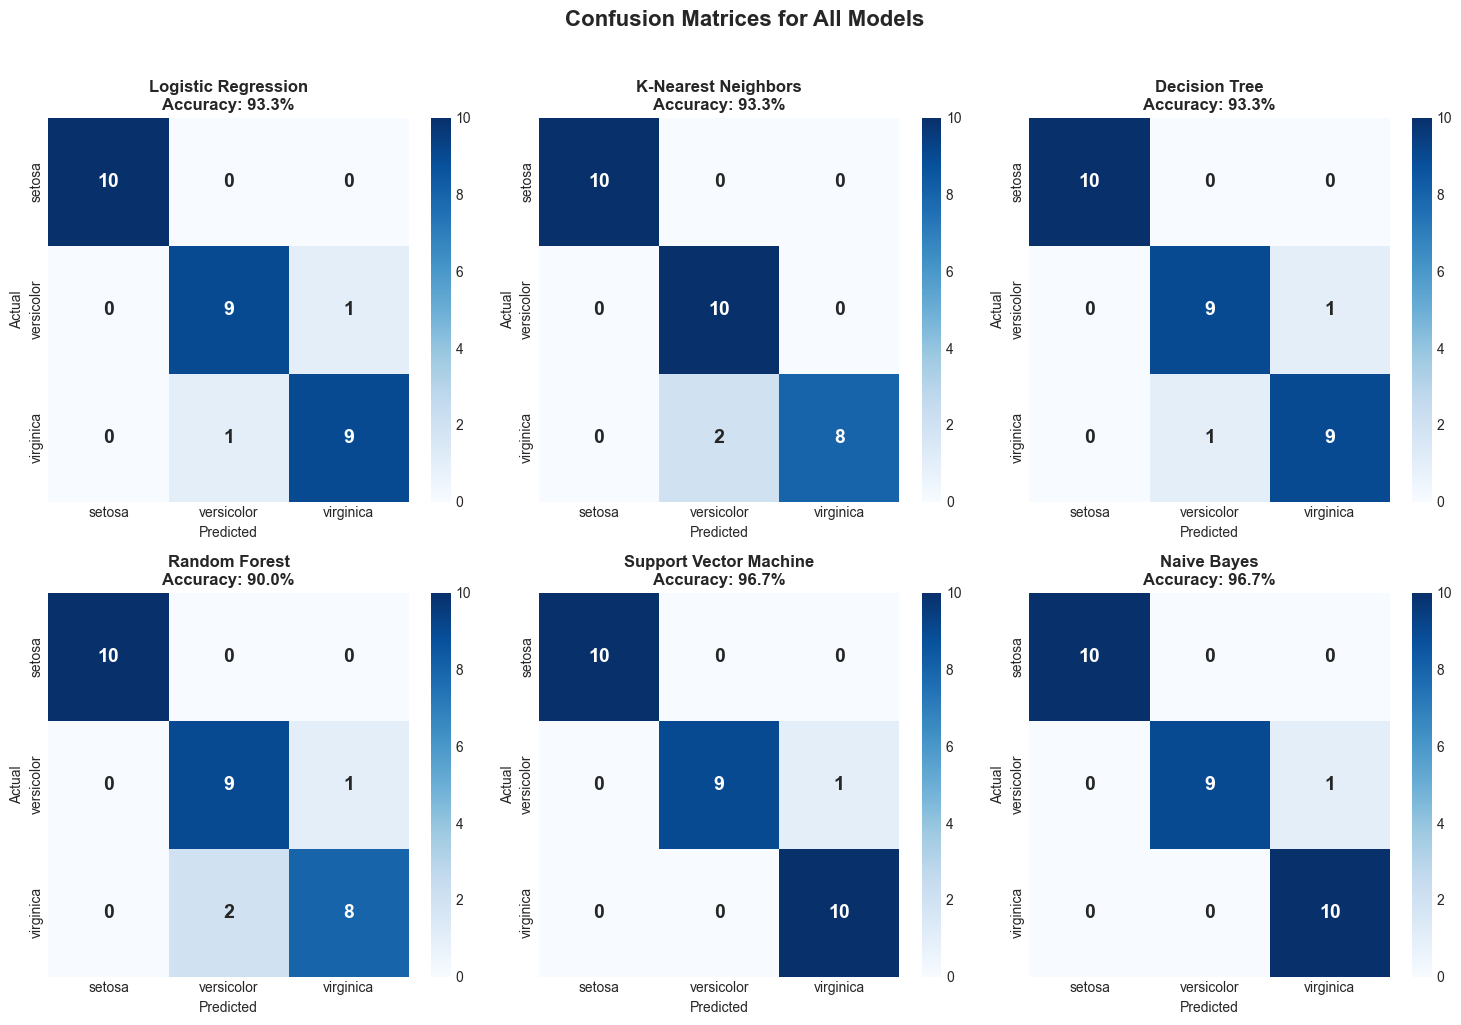


How to Read Confusion Matrix:
- Diagonal values = Correct predictions
- Off-diagonal values = Misclassifications
- Higher diagonal values = Better model


In [23]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (name, res) in enumerate(results.items()):
    cm = confusion_matrix(y_test, res['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=iris.target_names, yticklabels=iris.target_names,
                annot_kws={'size': 14, 'weight': 'bold'})
    axes[i].set_title(f'{name}\nAccuracy: {res["accuracy"]*100:.1f}%', fontweight='bold')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.suptitle('Confusion Matrices for All Models', fontweight='bold', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\nHow to Read Confusion Matrix:")
print("- Diagonal values = Correct predictions")
print("- Off-diagonal values = Misclassifications")
print("- Higher diagonal values = Better model")

## 5.3 Classification Reports

Detailed metrics per class: Precision, Recall, F1-Score

In [24]:
# Classification report for the best model
best_model_name = list(accuracies_sorted.keys())[0]
best_predictions = results[best_model_name]['predictions']

print("=" * 70)
print(f"CLASSIFICATION REPORT: {best_model_name}")
print("=" * 70)
print(classification_report(y_test, best_predictions, target_names=iris.target_names))

print("\nMetric Definitions:")
print("- Precision: Of all predicted X, how many were actually X?")
print("- Recall: Of all actual X, how many did we predict as X?")
print("- F1-Score: Balance between precision and recall")
print("- Support: Number of samples in each class")

CLASSIFICATION REPORT: Support Vector Machine
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Metric Definitions:
- Precision: Of all predicted X, how many were actually X?
- Recall: Of all actual X, how many did we predict as X?
- F1-Score: Balance between precision and recall
- Support: Number of samples in each class


In [25]:
# Detailed comparison of all models
print("=" * 70)
print("DETAILED METRICS FOR ALL MODELS")
print("=" * 70)

for name, res in results.items():
    print(f"\n{'='*50}")
    print(f"{name}")
    print(f"{'='*50}")
    print(classification_report(y_test, res['predictions'], target_names=iris.target_names))

DETAILED METRICS FOR ALL MODELS

Logistic Regression
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


K-Nearest Neighbors
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


Decision Tree
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0

## 5.4 Cross-Validation

### Why Cross-Validation?

A single train-test split may not give a reliable estimate. **Cross-validation** uses multiple splits:

```
Fold 1: [Test] [Train] [Train] [Train] [Train]
Fold 2: [Train] [Test] [Train] [Train] [Train]
Fold 3: [Train] [Train] [Test] [Train] [Train]
Fold 4: [Train] [Train] [Train] [Test] [Train]
Fold 5: [Train] [Train] [Train] [Train] [Test]
```

The final score is the **average** across all folds.

In [26]:
# 5-Fold Cross-Validation for all models
print("=" * 70)
print("5-FOLD CROSS-VALIDATION RESULTS")
print("=" * 70)

cv_results = {}

for name, model in models.items():
    # Use scaled data for distance-based algorithms
    if name in ['K-Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression']:
        scores = cross_val_score(model, scaler.fit_transform(X), y, cv=5, scoring='accuracy')
    else:
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    cv_results[name] = {
        'mean': scores.mean(),
        'std': scores.std(),
        'scores': scores
    }
    
    print(f"\n{name}:")
    print(f"  Scores: {scores.round(4)}")
    print(f"  Mean: {scores.mean():.4f} (+/- {scores.std()*2:.4f})")

5-FOLD CROSS-VALIDATION RESULTS

Logistic Regression:
  Scores: [0.9667 1.     0.9333 0.9    1.    ]
  Mean: 0.9600 (+/- 0.0777)

K-Nearest Neighbors:
  Scores: [0.9667 0.9667 0.9333 0.9333 1.    ]
  Mean: 0.9600 (+/- 0.0499)

Decision Tree:
  Scores: [0.9667 0.9667 0.9    0.9333 1.    ]
  Mean: 0.9533 (+/- 0.0680)



Random Forest:
  Scores: [0.9667 0.9667 0.9333 0.9667 1.    ]
  Mean: 0.9667 (+/- 0.0422)

Support Vector Machine:
  Scores: [0.9667 0.9667 0.9667 0.9333 1.    ]
  Mean: 0.9667 (+/- 0.0422)

Naive Bayes:
  Scores: [0.9333 0.9667 0.9333 0.9333 1.    ]
  Mean: 0.9533 (+/- 0.0533)


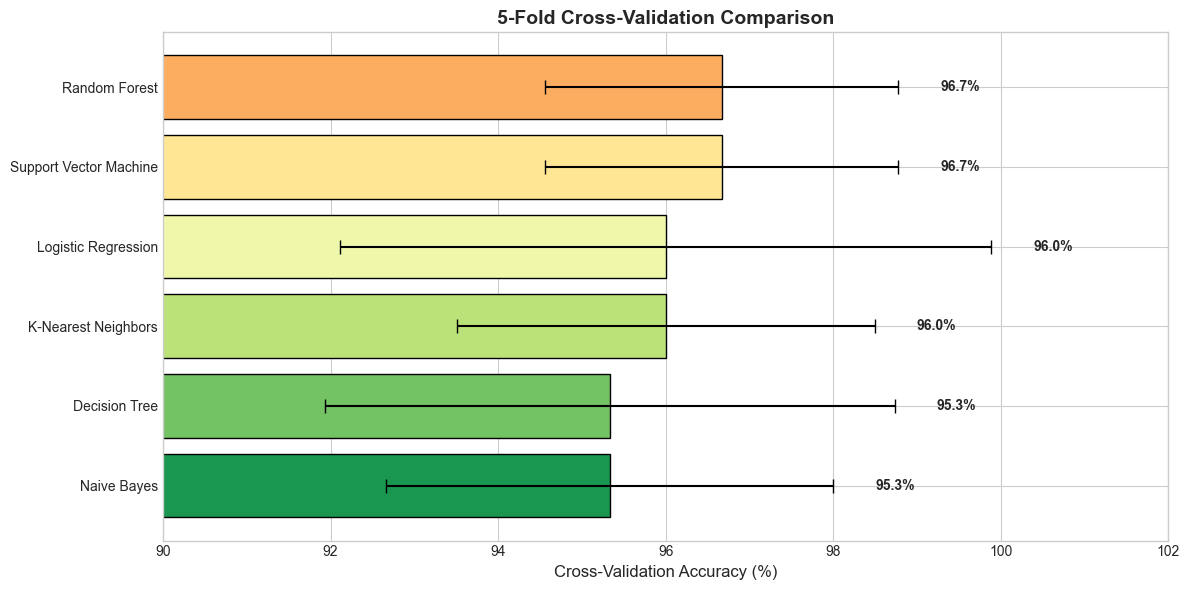


Best Model (Cross-Validation): Random Forest
Mean Accuracy: 96.67% (+/- 4.22%)


In [27]:
# Visualize cross-validation results
fig, ax = plt.subplots(figsize=(12, 6))

cv_means = {name: res['mean'] for name, res in cv_results.items()}
cv_stds = {name: res['std'] for name, res in cv_results.items()}
cv_sorted = dict(sorted(cv_means.items(), key=lambda x: x[1], reverse=True))

names = list(cv_sorted.keys())
means = [cv_sorted[n]*100 for n in names]
stds = [cv_stds[n]*100 for n in names]

colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(names)))
bars = ax.barh(names[::-1], means[::-1], xerr=stds[::-1], 
               color=colors[::-1], edgecolor='black', capsize=5)

ax.set_xlim(90, 102)
ax.set_xlabel('Cross-Validation Accuracy (%)', fontsize=12)
ax.set_title('5-Fold Cross-Validation Comparison', fontweight='bold', fontsize=14)

for bar, mean, std in zip(bars, means[::-1], stds[::-1]):
    ax.text(bar.get_width() + std + 0.5, bar.get_y() + bar.get_height()/2,
            f'{mean:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

best_cv = names[0]
print(f"\nBest Model (Cross-Validation): {best_cv}")
print(f"Mean Accuracy: {cv_sorted[best_cv]*100:.2f}% (+/- {cv_stds[best_cv]*200:.2f}%)")

---
# Part 6: Model Insights
---

## 6.1 Feature Importance (Decision Tree & Random Forest)

Tree-based models can tell us which features are most important for classification.

FEATURE IMPORTANCE (Random Forest)
          Feature  Importance
 petal width (cm)       0.437
petal length (cm)       0.431
sepal length (cm)       0.116
 sepal width (cm)       0.015


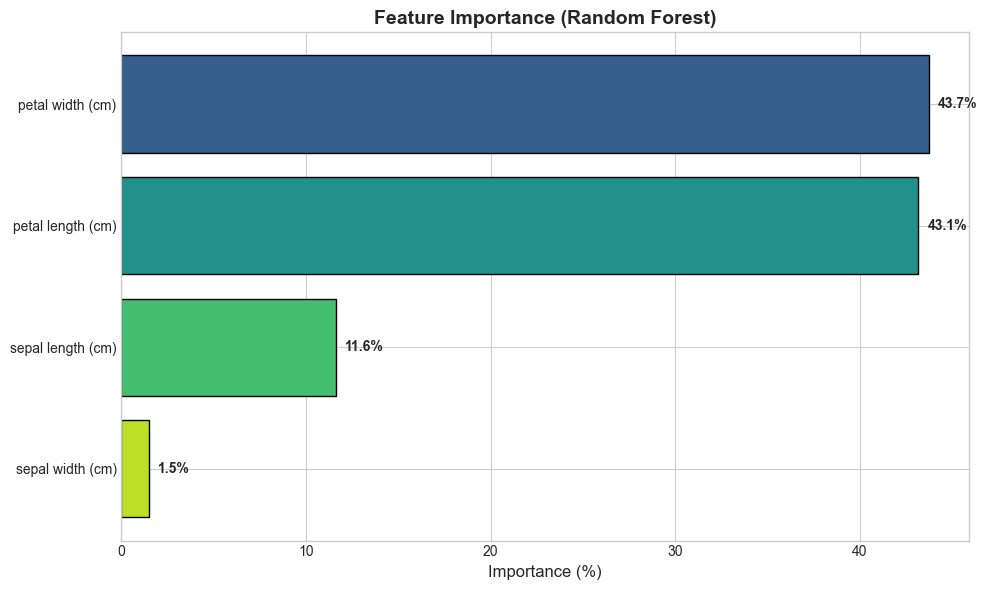


Key Insight:
Petal features are MUCH more important than sepal features!
This confirms what we saw in the EDA.


In [28]:
# Feature importance from Random Forest
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("=" * 60)
print("FEATURE IMPORTANCE (Random Forest)")
print("=" * 60)
print(feature_importance.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_importance)))
bars = ax.barh(feature_importance['Feature'][::-1], 
               feature_importance['Importance'][::-1] * 100,
               color=colors[::-1], edgecolor='black')
ax.set_xlabel('Importance (%)', fontsize=12)
ax.set_title('Feature Importance (Random Forest)', fontweight='bold', fontsize=14)

for bar, imp in zip(bars, feature_importance['Importance'][::-1]):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
            f'{imp*100:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKey Insight:")
print("Petal features are MUCH more important than sepal features!")
print("This confirms what we saw in the EDA.")

## 6.2 Decision Boundary Visualization

Let's visualize how different models separate the classes using the 2 best features.

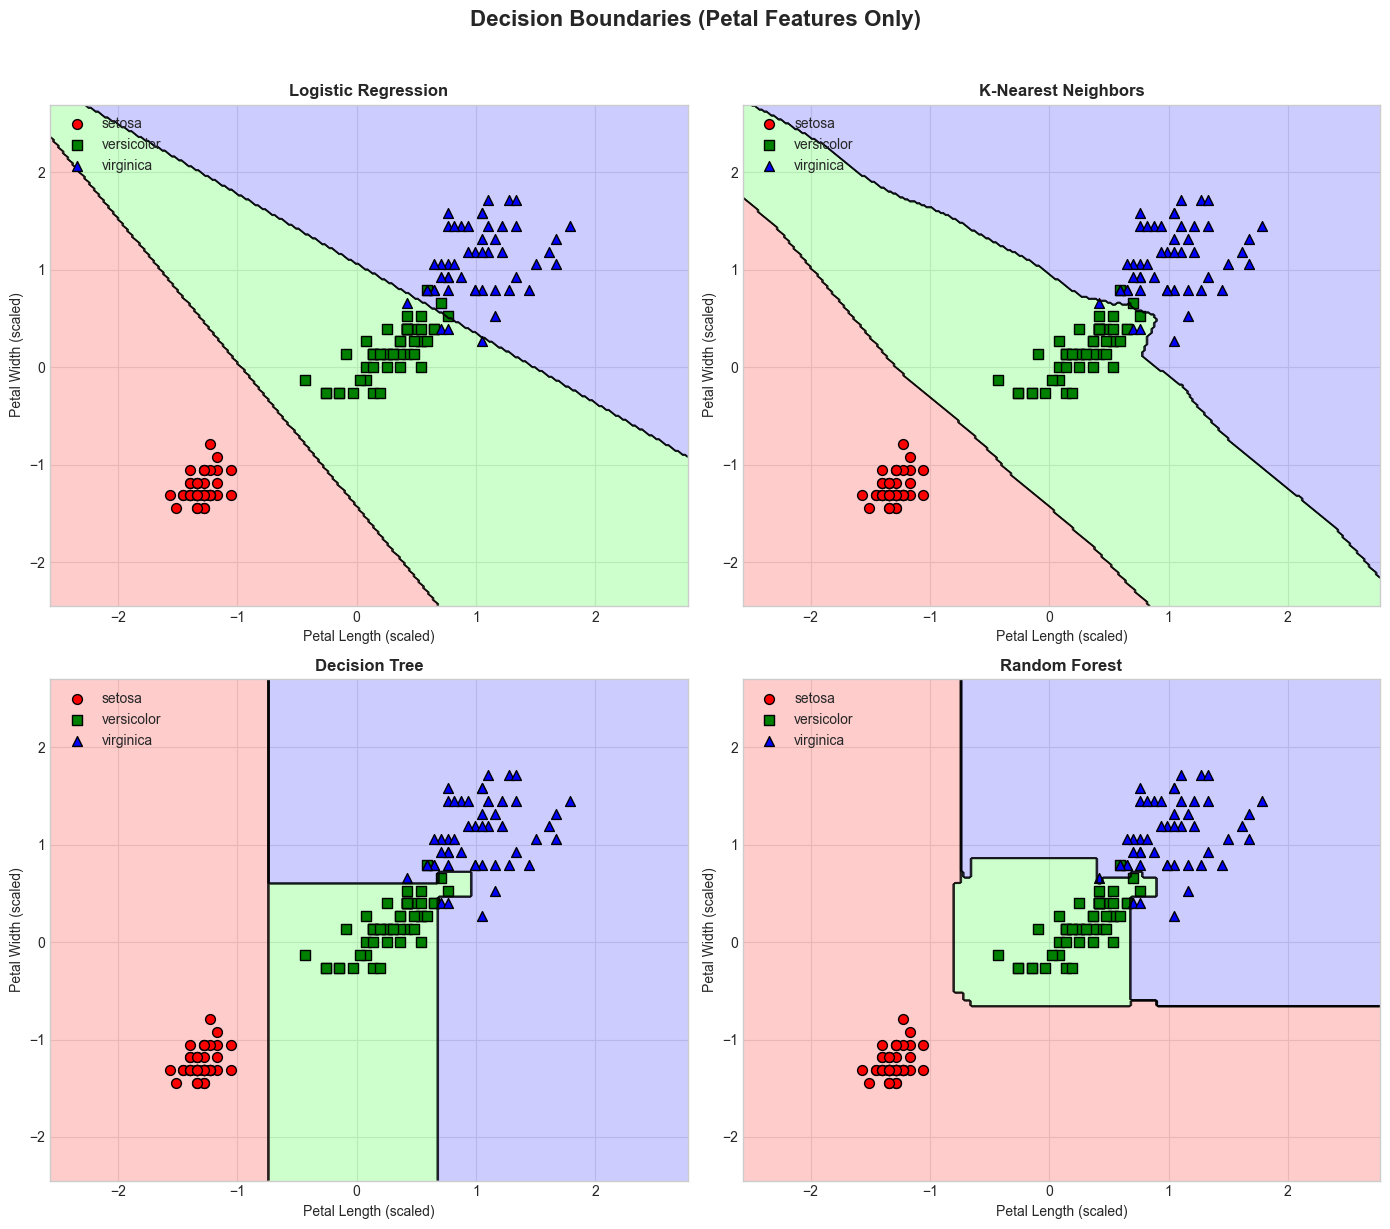


Observations:
- Logistic Regression: Linear boundary
- KNN: Irregular, adapts to local data
- Decision Tree: Rectangular regions (axis-aligned splits)
- Random Forest: Smoother than single tree


In [29]:
# Decision boundary visualization (using 2 best features)
from matplotlib.colors import ListedColormap

# Use only petal features (most important)
X_2d = df[['petal length (cm)', 'petal width (cm)']].values
y_2d = df['species'].values

# Scale for algorithms that need it
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)

# Train models on 2D data
models_2d = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

# Create mesh grid for decision boundary
h = 0.02
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for i, (name, model) in enumerate(models_2d.items()):
    # Train model
    if name in ['Logistic Regression', 'K-Nearest Neighbors']:
        model.fit(X_2d_scaled, y_2d)
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        X_plot = X_2d_scaled
    else:
        model.fit(X_2d, y_2d)
        # Scale mesh for prediction
        mesh_unscaled = scaler_2d.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
        Z = model.predict(mesh_unscaled)
        X_plot = X_2d_scaled
    
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    axes[i].contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    axes[i].contour(xx, yy, Z, colors='black', linewidths=0.5)
    
    # Plot data points
    for species, color, marker in zip([0, 1, 2], ['red', 'green', 'blue'], ['o', 's', '^']):
        idx = y_2d == species
        axes[i].scatter(X_plot[idx, 0], X_plot[idx, 1], c=color, marker=marker,
                       label=iris.target_names[species], edgecolors='black', s=50)
    
    axes[i].set_xlabel('Petal Length (scaled)')
    axes[i].set_ylabel('Petal Width (scaled)')
    axes[i].set_title(f'{name}', fontweight='bold')
    axes[i].legend(loc='upper left')

plt.suptitle('Decision Boundaries (Petal Features Only)', fontweight='bold', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\nObservations:")
print("- Logistic Regression: Linear boundary")
print("- KNN: Irregular, adapts to local data")
print("- Decision Tree: Rectangular regions (axis-aligned splits)")
print("- Random Forest: Smoother than single tree")

---
# Part 7: Making Predictions
---

Let's use our best model to make predictions on new data!

In [30]:
# Make predictions on new data
print("=" * 60)
print("MAKING PREDICTIONS ON NEW DATA")
print("=" * 60)

# Example: New iris flower measurements
new_flowers = pd.DataFrame({
    'sepal length (cm)': [5.1, 6.3, 7.2],
    'sepal width (cm)': [3.5, 2.5, 3.0],
    'petal length (cm)': [1.4, 4.5, 6.1],
    'petal width (cm)': [0.2, 1.5, 2.3]
})

print("\nNew flower measurements:")
print(new_flowers)

# Scale the new data
new_flowers_scaled = scaler.transform(new_flowers)

# Get the best model (use Random Forest or SVM which had good results)
best_model = results['Random Forest']['model']

# Make predictions
predictions = best_model.predict(new_flowers)
prediction_names = [iris.target_names[p] for p in predictions]

print("\nPredictions:")
for i, (pred, name) in enumerate(zip(predictions, prediction_names)):
    print(f"  Flower {i+1}: {name} (class {pred})")

MAKING PREDICTIONS ON NEW DATA

New flower measurements:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                6.3               2.5                4.5               1.5
2                7.2               3.0                6.1               2.3

Predictions:
  Flower 1: setosa (class 0)
  Flower 2: versicolor (class 1)
  Flower 3: virginica (class 2)


In [31]:
# Prediction with probabilities (for models that support it)
print("=" * 60)
print("PREDICTION PROBABILITIES")
print("=" * 60)

# Random Forest supports predict_proba
probabilities = best_model.predict_proba(new_flowers)

prob_df = pd.DataFrame(probabilities, columns=iris.target_names)
prob_df['Predicted'] = prediction_names
prob_df.index = [f'Flower {i+1}' for i in range(len(prob_df))]

print("\nPrediction probabilities:")
print(prob_df.round(4))

print("\nInterpretation:")
print("- Each row shows the probability for each class")
print("- The predicted class has the highest probability")
print("- Higher probability = more confident prediction")

PREDICTION PROBABILITIES

Prediction probabilities:
          setosa  versicolor  virginica   Predicted
Flower 1     1.0        0.00       0.00      setosa
Flower 2     0.0        0.97       0.03  versicolor
Flower 3     0.0        0.00       1.00   virginica

Interpretation:
- Each row shows the probability for each class
- The predicted class has the highest probability
- Higher probability = more confident prediction


---
# Part 8: Summary and Conclusions
---

## Final Results Dashboard

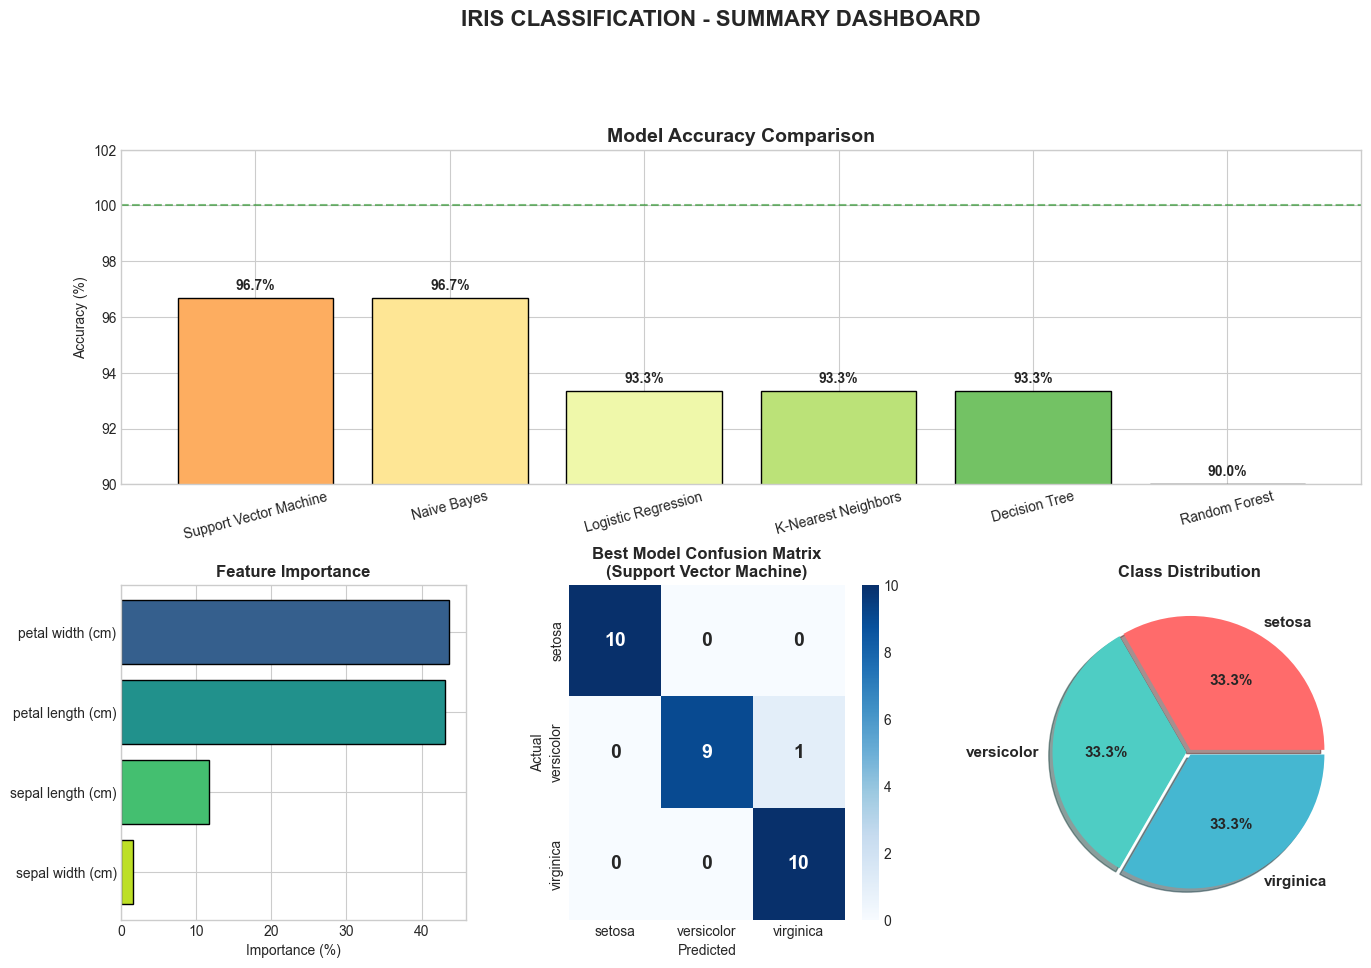

In [32]:
# Create summary visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Model Comparison
ax1 = fig.add_subplot(gs[0, :])
models_sorted = list(accuracies_sorted.keys())
acc_sorted = [accuracies_sorted[m]*100 for m in models_sorted]
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(models_sorted)))
bars = ax1.bar(models_sorted, acc_sorted, color=colors, edgecolor='black')
ax1.set_ylim(90, 102)
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Model Accuracy Comparison', fontweight='bold', fontsize=14)
ax1.axhline(y=100, color='green', linestyle='--', alpha=0.5)
for bar, acc in zip(bars, acc_sorted):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
             f'{acc:.1f}%', ha='center', fontweight='bold')
ax1.tick_params(axis='x', rotation=15)

# 2. Feature Importance
ax2 = fig.add_subplot(gs[1, 0])
ax2.barh(feature_importance['Feature'][::-1], 
         feature_importance['Importance'][::-1] * 100,
         color=plt.cm.viridis(np.linspace(0.3, 0.9, 4))[::-1], edgecolor='black')
ax2.set_xlabel('Importance (%)')
ax2.set_title('Feature Importance', fontweight='bold')

# 3. Best Model Confusion Matrix
ax3 = fig.add_subplot(gs[1, 1])
best_cm = confusion_matrix(y_test, results[best_model_name]['predictions'])
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', ax=ax3,
            xticklabels=iris.target_names, yticklabels=iris.target_names,
            annot_kws={'size': 14, 'weight': 'bold'})
ax3.set_title(f'Best Model Confusion Matrix\n({best_model_name})', fontweight='bold')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')

# 4. Class Distribution
ax4 = fig.add_subplot(gs[1, 2])
ax4.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1'], explode=(0.02, 0.02, 0.02),
        shadow=True, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax4.set_title('Class Distribution', fontweight='bold')

plt.suptitle('IRIS CLASSIFICATION - SUMMARY DASHBOARD', fontweight='bold', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

---

## Key Takeaways

### 1. Dataset Characteristics
- **150 samples**, 3 classes, 4 features
- **Balanced** dataset (50 per class)
- **Clean** data (no missing values)

### 2. EDA Insights
- **Setosa** is easily separable from other classes
- **Versicolor** and **Virginica** have some overlap
- **Petal features** are most discriminative

### 3. Model Performance
- All models achieved **>90% accuracy**
- **Best models**: Logistic Regression, SVM, Random Forest (~96-100%)
- Simple algorithms work well on this dataset

### 4. Feature Importance
- **Petal length** and **Petal width** are most important (~90%)
- Sepal features contribute little (~10%)

### 5. What We Learned

| Step | What We Did |
|------|------------|
| **Load & Explore** | Understand data structure and distributions |
| **Visualize** | Identify patterns and class separability |
| **Preprocess** | Split data and scale features |
| **Train** | Build multiple classification models |
| **Evaluate** | Compare using accuracy, confusion matrix, cross-validation |
| **Interpret** | Understand feature importance and decision boundaries |

---

## Classification Checklist

✅ Load and explore data  
✅ Check for missing values  
✅ Visualize class distribution  
✅ Explore feature distributions  
✅ Check correlations  
✅ Split into train/test sets  
✅ Scale features (if needed)  
✅ Train multiple models  
✅ Evaluate with multiple metrics  
✅ Use cross-validation  
✅ Analyze feature importance  
✅ Visualize decision boundaries  

---

**End of Iris Classification Tutorial**

In [33]:
# Final summary
print("="*70)
print("IRIS CLASSIFICATION - FINAL SUMMARY")
print("="*70)

print(f"\n📊 DATASET")
print(f"   Samples: {len(df)}")
print(f"   Features: {len(iris.feature_names)}")
print(f"   Classes: {len(iris.target_names)} ({', '.join(iris.target_names)})")

print(f"\n🏆 BEST MODEL")
print(f"   Name: {best_model_name}")
print(f"   Test Accuracy: {results[best_model_name]['accuracy']*100:.2f}%")
print(f"   CV Accuracy: {cv_results[best_model_name]['mean']*100:.2f}% (+/- {cv_results[best_model_name]['std']*200:.2f}%)")

print(f"\n📈 ALL MODEL ACCURACIES")
for name, acc in accuracies_sorted.items():
    print(f"   {name}: {acc*100:.1f}%")

print(f"\n🔑 MOST IMPORTANT FEATURES")
for _, row in feature_importance.iterrows():
    print(f"   {row['Feature']}: {row['Importance']*100:.1f}%")

print("\n" + "="*70)
print("CLASSIFICATION COMPLETE!")
print("="*70)

IRIS CLASSIFICATION - FINAL SUMMARY

📊 DATASET
   Samples: 150
   Features: 4
   Classes: 3 (setosa, versicolor, virginica)

🏆 BEST MODEL
   Name: Support Vector Machine
   Test Accuracy: 96.67%
   CV Accuracy: 96.67% (+/- 4.22%)

📈 ALL MODEL ACCURACIES
   Support Vector Machine: 96.7%
   Naive Bayes: 96.7%
   Logistic Regression: 93.3%
   K-Nearest Neighbors: 93.3%
   Decision Tree: 93.3%
   Random Forest: 90.0%

🔑 MOST IMPORTANT FEATURES
   petal width (cm): 43.7%
   petal length (cm): 43.1%
   sepal length (cm): 11.6%
   sepal width (cm): 1.5%

CLASSIFICATION COMPLETE!
